# Library Import

In [1]:
suppressPackageStartupMessages(library(edgeR))
suppressPackageStartupMessages(library(Homo.sapiens))
gOrganismPackage = Homo.sapiens

# Data Import
## Count Data

In [2]:
gUnorderedGeneCountsDf <- read.csv("HF_RSEM_Unnormalized_Isoform_Counts_rRNA_removed.csv", stringsAsFactors=FALSE, row.names=1)
dim(gUnorderedGeneCountsDf)
head(gUnorderedGeneCountsDf)

[1] 227954    845

,COVSUBJ_0001_1_P_HA_filtered.human,COVSUBJ_0002_1_N_HA_filtered.human,COVSUBJ_0003_1_P_HA_filtered.human,COVSUBJ_0004_1_N_HA_filtered.human,COVSUBJ_0004_2_N_HA_filtered.human,COVSUBJ_0005_1_N_HA_filtered.human,COVSUBJ_0006_1_N_HA_filtered.human,COVSUBJ_0007_1_N_HA_filtered.human,COVSUBJ_0007_2_N_HA_filtered.human,COVSUBJ_0008_1_N_HA_filtered.human,⋯,ENVHA_338337127_HA_filtered.human,ENVHA_338337295_HA_filtered.human,ENVHA_338337338_HA_filtered.human,ENVHA_338338122_HA_filtered.human,ENVHA_338339731_HA_filtered.human,ENVHA_338339754_HA_filtered.human,NegWC_1_WC_filtered.human,NegWC_2_WC_filtered.human,PosWC_1_WC_filtered.human,PosWC_2_WC_filtered.human
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENST00000373020_TSPAN6-201,2815.32,1403.79,1483,45.84,2903.87,125.32,1320.72,443,1,2490.51,⋯,0,0,0,0,0,0,0,0,0,0
ENST00000494424_TSPAN6-202,0.00,0.00,0,1.49,0.00,0.00,29.55,0,0,0.00,⋯,0,0,0,0,0,0,0,0,0,0
ENST00000496771_TSPAN6-203,31.61,44.21,0,0.00,49.84,0.00,21.73,0,0,13.46,⋯,0,0,0,0,0,0,0,0,0,0
ENST00000612152_TSPAN6-204,13.94,0.00,0,0.00,0.00,0.00,0.00,0,0,0.00,⋯,0,0,0,0,0,0,0,0,0,0
ENST00000614008_TSPAN6-205,30.14,0.00,0,5.67,278.30,12.68,0.00,0,0,21.03,⋯,0,0,0,0,0,0,0,0,0,0
ENST00000373031_TNMD-201,0.00,0.00,0,0.00,0.00,0.00,0.00,0,0,3.00,⋯,0,0,0,0,0,0,0,0,0,0


In [3]:
row.names(gUnorderedGeneCountsDf) <- sapply(strsplit(row.names(gUnorderedGeneCountsDf), "_"), `[`, 1)
colnames(gUnorderedGeneCountsDf) <- gsub("_filtered.human", "", colnames(gUnorderedGeneCountsDf))

In [4]:
# Remove conflicting samples
gUnorderedGeneCountsDf <- subset(gUnorderedGeneCountsDf, select=-c(COVSUBJ_0137_1_N_HA, COVSUBJ_0146_1_N_HA, COVSUBJ_0376_1_N_HA, COVSUBJ_0461_1_N_HA,COVSUBJ_0558_1_N_HA,COVSUBJ_0619_1_N_HA))


In [5]:
head(gUnorderedGeneCountsDf)
dim(gUnorderedGeneCountsDf)

,COVSUBJ_0001_1_P_HA,COVSUBJ_0002_1_N_HA,COVSUBJ_0003_1_P_HA,COVSUBJ_0004_1_N_HA,COVSUBJ_0004_2_N_HA,COVSUBJ_0005_1_N_HA,COVSUBJ_0006_1_N_HA,COVSUBJ_0007_1_N_HA,COVSUBJ_0007_2_N_HA,COVSUBJ_0008_1_N_HA,⋯,ENVHA_338337127_HA,ENVHA_338337295_HA,ENVHA_338337338_HA,ENVHA_338338122_HA,ENVHA_338339731_HA,ENVHA_338339754_HA,NegWC_1_WC,NegWC_2_WC,PosWC_1_WC,PosWC_2_WC
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENST00000373020,2815.32,1403.79,1483,45.84,2903.87,125.32,1320.72,443,1,2490.51,⋯,0,0,0,0,0,0,0,0,0,0
ENST00000494424,0.00,0.00,0,1.49,0.00,0.00,29.55,0,0,0.00,⋯,0,0,0,0,0,0,0,0,0,0
ENST00000496771,31.61,44.21,0,0.00,49.84,0.00,21.73,0,0,13.46,⋯,0,0,0,0,0,0,0,0,0,0
ENST00000612152,13.94,0.00,0,0.00,0.00,0.00,0.00,0,0,0.00,⋯,0,0,0,0,0,0,0,0,0,0
ENST00000614008,30.14,0.00,0,5.67,278.30,12.68,0.00,0,0,21.03,⋯,0,0,0,0,0,0,0,0,0,0
ENST00000373031,0.00,0.00,0,0.00,0.00,0.00,0.00,0,0,3.00,⋯,0,0,0,0,0,0,0,0,0,0


[1] 227954    839

## Metadata

In [6]:
gMetadataDf <- read.csv("Updated_Cornell_Metadata_08072020_KF_20210908.txt", stringsAsFactors=FALSE, sep = "\t")
dim(gMetadataDf)

[1] 732  82

In [7]:
# Remove conflicting samples
gMetadataDf <- gMetadataDf[ ! gMetadataDf$SampleID %in% c("COVSUBJ_0137_1_N_HA", "COVSUBJ_0146_1_N_HA", "COVSUBJ_0376_1_N_HA", "COVSUBJ_0461_1_N_HA", "COVSUBJ_0558_1_N_HA", "COVSUBJ_0619_1_N_HA"),]
gMetadataDf

,SampleID,SampleID_nobatch,Subject,SamplePlate_orig,IncludeInAnalysis,Notes_UPDATE,DeDupList,paired,Replicate,SequencingBatch,⋯,DIAGNOSIS_CerebralVascularDisease_LastDxDate_RelativeDay,VENT_Total_Ventilation_Orders,VENT_Tracheostomy_Performed,VENT_Tube_Exchange_Performed,VENT_Total_Ventilation_Minutes,VENT_First_Ventilation_Date_RelativeHour,RC_Patient_Age,RC_HISTORY_BMI,RC_HISTORY_Pregnancy,RC_HISTORY_PregnancyWeeks
,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<lgl>,<chr>,<int>,<chr>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
1,COVSUBJ_0001_1_P_HA,COVSUBJ_0001_1_P,COVSUBJ_0001,P10,TRUE,,TRUE,,1,B2_HA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,COVSUBJ_0002_1_N_HA,COVSUBJ_0002_1_N,COVSUBJ_0002,P1,TRUE,,TRUE,,1,B3_HA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,COVSUBJ_0003_1_P_HA,COVSUBJ_0003_1_P,COVSUBJ_0003,P1,TRUE,,TRUE,,1,B3_HA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,COVSUBJ_0004_1_N_HA,COVSUBJ_0004_1_N,COVSUBJ_0004,P1,TRUE,,FALSE,,1,B3_HA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,COVSUBJ_0004_2_N_HA,COVSUBJ_0004_2_N,COVSUBJ_0004,P1,TRUE,,TRUE,,2,B3_HA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,COVSUBJ_0005_1_N_HA,COVSUBJ_0005_1_N,COVSUBJ_0005,P1,TRUE,,TRUE,,1,B3_HA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
7,COVSUBJ_0006_1_N_HA,COVSUBJ_0006_1_N,COVSUBJ_0006,P1,TRUE,,TRUE,,1,B3_HA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
8,COVSUBJ_0007_1_N_HA,COVSUBJ_0007_1_N,COVSUBJ_0007,P1,TRUE,,FALSE,,1,B3_HA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
9,COVSUBJ_0007_2_N_HA,COVSUBJ_0007_2_N,COVSUBJ_0007,P1,TRUE,,TRUE,,2,B3_HA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [8]:
gSampleNames = gMetadataDf[["SampleID"]]

In [9]:
dim(gUnorderedGeneCountsDf)
dim(gMetadataDf)

table(colnames(gUnorderedGeneCountsDf) %in% gSampleNames)

[1] 227954    839

[1] 726  82


FALSE  TRUE 
  113   726 

In [10]:
gGeneCountsDf = gUnorderedGeneCountsDf[gSampleNames]
head(gGeneCountsDf)

,COVSUBJ_0001_1_P_HA,COVSUBJ_0002_1_N_HA,COVSUBJ_0003_1_P_HA,COVSUBJ_0004_1_N_HA,COVSUBJ_0004_2_N_HA,COVSUBJ_0005_1_N_HA,COVSUBJ_0006_1_N_HA,COVSUBJ_0007_1_N_HA,COVSUBJ_0007_2_N_HA,COVSUBJ_0008_1_N_HA,⋯,COVSUBJ_0660_1_P_HA,COVSUBJ_0661_1_N_HA,COVSUBJ_0662_1_P_HA,COVSUBJ_0663_1_P_HA,COVSUBJ_0664_1_P_HA,COVSUBJ_0665_1_P_HA,COVSUBJ_0666_1_N_HA,COVSUBJ_0667_1_P_HA,COVSUBJ_0668_1_P_HA,COVSUBJ_0669_1_N_HA
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENST00000373020,2815.32,1403.79,1483,45.84,2903.87,125.32,1320.72,443,1,2490.51,⋯,1698.56,18,2250.92,1972.29,3110.56,4476.43,1923.45,2214.23,6834.69,1.29
ENST00000494424,0.00,0.00,0,1.49,0.00,0.00,29.55,0,0,0.00,⋯,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ENST00000496771,31.61,44.21,0,0.00,49.84,0.00,21.73,0,0,13.46,⋯,0.00,0,23.76,6.71,12.43,48.39,7.54,11.59,55.31,0.00
ENST00000612152,13.94,0.00,0,0.00,0.00,0.00,0.00,0,0,0.00,⋯,0.00,0,10.15,0.00,25.76,9.34,0.00,0.00,0.00,0.00
ENST00000614008,30.14,0.00,0,5.67,278.30,12.68,0.00,0,0,21.03,⋯,48.44,0,14.16,0.00,19.26,103.83,28.01,7.18,0.00,4.71
ENST00000373031,0.00,0.00,0,0.00,0.00,0.00,0.00,0,0,3.00,⋯,0.00,0,10.00,0.00,12.00,0.00,0.00,0.00,0.00,0.00


# Annotations

In [11]:
# Import the R data object containing gene annotations and load its dataframe into a variable:
load("Homo_sapiens_GRCh38p12_gencodev29_ANNOT.Rdata")
gGeneTypeAnnotationsDf = ANNOT
head(gGeneTypeAnnotationsDf)

,gene_type,gene_id,transcript_id
,<chr>,<chr>,<chr>
1,transcribed_unprocessed_pseudogene,ENSG00000223972.5,ENST00000456328.2
2,transcribed_unprocessed_pseudogene,ENSG00000223972.5,ENST00000450305.2
3,unprocessed_pseudogene,ENSG00000227232.5,ENST00000488147.1
4,miRNA,ENSG00000278267.1,ENST00000619216.1
5,lincRNA,ENSG00000243485.5,ENST00000473358.1
6,lincRNA,ENSG00000243485.5,ENST00000469289.1


In [12]:
splitGeneCountsByCodingStatus = function(geneCountDf, gtfDf, removeVersion=FALSE){
    #Subset GTF by protein coding and noncoding
    ANNOT_protein_coding <- subset(gtfDf, gene_type == "protein_coding")
    ANNOT_ncRNA <- subset(gtfDf, gene_type %in% c("lincRNA", "antisense", "processed_transcript","sense_overlapping", "sense_intronic"))
#     ANNOT_ncRNA <- subset(gtfDf, gene_type %in% c("lncRNA", "antisense", "processed_transcript","sense_overlapping", "sense_intronic"))

    #make list of IDs to query
    protein_coding_ids <- ANNOT_protein_coding$transcript_id
    ncRNA_ids <- ANNOT_ncRNA$transcript_id
    
    if (removeVersion){
        protein_coding_ids <- removeAccessionVersion(protein_coding_ids)
        ncRNA_ids <- removeAccessionVersion(ncRNA_ids)        
    }

    #subset geneCounts
    geneCount_protein_coding <- subset(geneCountDf, row.names(geneCountDf) %in% protein_coding_ids)
    geneCount_ncRNA <- subset(geneCountDf, row.names(geneCountDf) %in% ncRNA_ids)
    return(list(codingGeneCountDf=geneCount_protein_coding, noncodingGeneCountDf=geneCount_ncRNA))
}

removeAccessionVersion = function(accessionVector){
    return (gsub("\\..*","",accessionVector))
}

writeSubsetCounts = function(subsetCountsDf, outputDir, runName, fileSuffix){
    fileName = sprintf(fileSuffix, runName)
    write.csv(subsetCountsDf, file.path(outputDir, fileName))
    print(paste0("Output file: ",fileName))
}

writeSubsetsCounts = function(splitGeneCountDfsList, outputDir, runName){
    writeSubsetCounts(splitGeneCountDfsList$codingGeneCountDf, outputDir, runName,"%s_raw_pc_genes_counts.csv")
    writeSubsetCounts(splitGeneCountDfsList$noncodingGeneCountDf, outputDir, runName,"%s_raw_nc_genes_counts.csv")
}

In [13]:
gSplitGeneCountDfsList = splitGeneCountsByCodingStatus(gGeneCountsDf, gGeneTypeAnnotationsDf, TRUE)

In [14]:
dim(gGeneCountsDf)
dim(gSplitGeneCountDfsList$codingGeneCountDf)
dim(gSplitGeneCountDfsList$noncodingGeneCountDf)

[1] 227954    726

[1] 150336    726

[1] 28093   726

# Data Integration

In [15]:
# create a DGEList object
makeDgeList = function(countsDf, metadataDf, groupColName){
    # remove the accession version (.##etc) from the ensembl gene id
    id_list <- gsub("[.].*$","", row.names(countsDf))
    row.names(countsDf) <- id_list
    # Note: in DGEList constructor, parameters
    # lib.size = colSums(counts_matrix), 
    # norm.factors = rep(1,ncol(counts_matrix)), 
    # genes = NULL, and remove.zeros = FALSE
    # are all identical to the default values you'd get if you didn't 
    # specify these arguments at all ...
    x <- DGEList(counts = countsDf, lib.size = colSums(countsDf),
    norm.factors = rep(1,ncol(countsDf)), samples = metadataDf,
        group = metadataDf[[groupColName]], genes = NULL, remove.zeros = FALSE)
    return(x)
}

In [16]:
gGroupCategory = "RT_PCR_Result" # e.g., "day"
gRelevantGeneCountsDf <- gGeneCountsDf

gDgeList = makeDgeList(gRelevantGeneCountsDf, gMetadataDf, gGroupCategory)
names(gDgeList)

[1] "counts"  "samples"

In [17]:
head(gDgeList$counts)
head(gDgeList$samples)

,COVSUBJ_0001_1_P_HA,COVSUBJ_0002_1_N_HA,COVSUBJ_0003_1_P_HA,COVSUBJ_0004_1_N_HA,COVSUBJ_0004_2_N_HA,COVSUBJ_0005_1_N_HA,COVSUBJ_0006_1_N_HA,COVSUBJ_0007_1_N_HA,COVSUBJ_0007_2_N_HA,COVSUBJ_0008_1_N_HA,⋯,COVSUBJ_0660_1_P_HA,COVSUBJ_0661_1_N_HA,COVSUBJ_0662_1_P_HA,COVSUBJ_0663_1_P_HA,COVSUBJ_0664_1_P_HA,COVSUBJ_0665_1_P_HA,COVSUBJ_0666_1_N_HA,COVSUBJ_0667_1_P_HA,COVSUBJ_0668_1_P_HA,COVSUBJ_0669_1_N_HA
ENST00000373020,2815.32,1403.79,1483,45.84,2903.87,125.32,1320.72,443,1,2490.51,⋯,1698.56,18,2250.92,1972.29,3110.56,4476.43,1923.45,2214.23,6834.69,1.29
ENST00000494424,0.00,0.00,0,1.49,0.00,0.00,29.55,0,0,0.00,⋯,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ENST00000496771,31.61,44.21,0,0.00,49.84,0.00,21.73,0,0,13.46,⋯,0.00,0,23.76,6.71,12.43,48.39,7.54,11.59,55.31,0.00
ENST00000612152,13.94,0.00,0,0.00,0.00,0.00,0.00,0,0,0.00,⋯,0.00,0,10.15,0.00,25.76,9.34,0.00,0.00,0.00,0.00
ENST00000614008,30.14,0.00,0,5.67,278.30,12.68,0.00,0,0,21.03,⋯,48.44,0,14.16,0.00,19.26,103.83,28.01,7.18,0.00,4.71
ENST00000373031,0.00,0.00,0,0.00,0.00,0.00,0.00,0,0,3.00,⋯,0.00,0,10.00,0.00,12.00,0.00,0.00,0.00,0.00,0.00


,group,lib.size,norm.factors,SampleID,SampleID_nobatch,Subject,SamplePlate_orig,IncludeInAnalysis,Notes_UPDATE,DeDupList,⋯,DIAGNOSIS_CerebralVascularDisease_LastDxDate_RelativeDay,VENT_Total_Ventilation_Orders,VENT_Tracheostomy_Performed,VENT_Tube_Exchange_Performed,VENT_Total_Ventilation_Minutes,VENT_First_Ventilation_Date_RelativeHour,RC_Patient_Age,RC_HISTORY_BMI,RC_HISTORY_Pregnancy,RC_HISTORY_PregnancyWeeks
,<fct>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<lgl>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
COVSUBJ_0001_1_P_HA,Detected,18310016.5,1,COVSUBJ_0001_1_P_HA,COVSUBJ_0001_1_P,COVSUBJ_0001,P10,TRUE,,TRUE,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
COVSUBJ_0002_1_N_HA,Not Detected,5430958.2,1,COVSUBJ_0002_1_N_HA,COVSUBJ_0002_1_N,COVSUBJ_0002,P1,TRUE,,TRUE,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
COVSUBJ_0003_1_P_HA,Detected,9280421.6,1,COVSUBJ_0003_1_P_HA,COVSUBJ_0003_1_P,COVSUBJ_0003,P1,TRUE,,TRUE,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
COVSUBJ_0004_1_N_HA,Not Detected,200794.3,1,COVSUBJ_0004_1_N_HA,COVSUBJ_0004_1_N,COVSUBJ_0004,P1,TRUE,,FALSE,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
COVSUBJ_0004_2_N_HA,Not Detected,2836982.7,1,COVSUBJ_0004_2_N_HA,COVSUBJ_0004_2_N,COVSUBJ_0004,P1,TRUE,,TRUE,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
COVSUBJ_0005_1_N_HA,Not Detected,131358.0,1,COVSUBJ_0005_1_N_HA,COVSUBJ_0005_1_N,COVSUBJ_0005,P1,TRUE,,TRUE,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


# Annotation Integration

In [18]:
getGeneDf = function(dgeList, organismPackage){
    geneid <- rownames(dgeList$counts)
     genes <- select(organismPackage, keys=geneid, columns=c("SYMBOL", "ENSEMBLTRANS", "ENTREZID"), keytype="ENSEMBLTRANS")
     return(genes)
}

In [19]:
gRawGenesDf = getGeneDf(gDgeList, gOrganismPackage)
dim(gRawGenesDf)

'select()' returned 1:many mapping between keys and columns



[1] 228227      3

In [20]:
# Add gene type to gRawGenesDf
gGeneTypeAnnotationsDf.rmdec <- gGeneTypeAnnotationsDf
gGeneTypeAnnotationsDf.rmdec$gene_id <- gsub("\\..*","",gGeneTypeAnnotationsDf.rmdec$gene_id)
gRawGenesDf$gene_type <- gGeneTypeAnnotationsDf$gene_type[match(gRawGenesDf$ENSEMBL, gGeneTypeAnnotationsDf.rmdec$gene_id)]

In [21]:
head(gRawGenesDf)

,ENSEMBLTRANS,ENTREZID,SYMBOL,gene_type
,<chr>,<chr>,<chr>,<chr>
1,ENST00000373020,NA,NA,NA
2,ENST00000494424,NA,NA,NA
3,ENST00000496771,NA,NA,NA
4,ENST00000612152,NA,NA,NA
5,ENST00000614008,NA,NA,NA
6,ENST00000373031,64102,TNMD,NA


In [22]:
gGeneIdCol <- "ENSEMBLTRANS"
gDuplicatesMask = duplicated(gRawGenesDf[[gGeneIdCol]])
sum(gDuplicatesMask) # Sum counts only those with a value of TRUE

[1] 273

In [23]:
gDeduplicatedGenesDf = gRawGenesDf[!duplicated(gRawGenesDf[[gGeneIdCol]]),]

In [24]:
dim(gDgeList$counts)
dim(gDeduplicatedGenesDf)
all(rownames(gDgeList$counts) %in% gDeduplicatedGenesDf[[gGeneIdCol]])

[1] 227954    726

[1] 227954      4

[1] TRUE

In [25]:
gDgeList$genes = gDeduplicatedGenesDf
names(gDgeList)

[1] "counts"  "samples" "genes"

In [26]:
head(gDgeList$counts)
head(gDgeList$samples)
head(gDgeList$genes)

,COVSUBJ_0001_1_P_HA,COVSUBJ_0002_1_N_HA,COVSUBJ_0003_1_P_HA,COVSUBJ_0004_1_N_HA,COVSUBJ_0004_2_N_HA,COVSUBJ_0005_1_N_HA,COVSUBJ_0006_1_N_HA,COVSUBJ_0007_1_N_HA,COVSUBJ_0007_2_N_HA,COVSUBJ_0008_1_N_HA,⋯,COVSUBJ_0660_1_P_HA,COVSUBJ_0661_1_N_HA,COVSUBJ_0662_1_P_HA,COVSUBJ_0663_1_P_HA,COVSUBJ_0664_1_P_HA,COVSUBJ_0665_1_P_HA,COVSUBJ_0666_1_N_HA,COVSUBJ_0667_1_P_HA,COVSUBJ_0668_1_P_HA,COVSUBJ_0669_1_N_HA
ENST00000373020,2815.32,1403.79,1483,45.84,2903.87,125.32,1320.72,443,1,2490.51,⋯,1698.56,18,2250.92,1972.29,3110.56,4476.43,1923.45,2214.23,6834.69,1.29
ENST00000494424,0.00,0.00,0,1.49,0.00,0.00,29.55,0,0,0.00,⋯,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ENST00000496771,31.61,44.21,0,0.00,49.84,0.00,21.73,0,0,13.46,⋯,0.00,0,23.76,6.71,12.43,48.39,7.54,11.59,55.31,0.00
ENST00000612152,13.94,0.00,0,0.00,0.00,0.00,0.00,0,0,0.00,⋯,0.00,0,10.15,0.00,25.76,9.34,0.00,0.00,0.00,0.00
ENST00000614008,30.14,0.00,0,5.67,278.30,12.68,0.00,0,0,21.03,⋯,48.44,0,14.16,0.00,19.26,103.83,28.01,7.18,0.00,4.71
ENST00000373031,0.00,0.00,0,0.00,0.00,0.00,0.00,0,0,3.00,⋯,0.00,0,10.00,0.00,12.00,0.00,0.00,0.00,0.00,0.00


,group,lib.size,norm.factors,SampleID,SampleID_nobatch,Subject,SamplePlate_orig,IncludeInAnalysis,Notes_UPDATE,DeDupList,⋯,DIAGNOSIS_CerebralVascularDisease_LastDxDate_RelativeDay,VENT_Total_Ventilation_Orders,VENT_Tracheostomy_Performed,VENT_Tube_Exchange_Performed,VENT_Total_Ventilation_Minutes,VENT_First_Ventilation_Date_RelativeHour,RC_Patient_Age,RC_HISTORY_BMI,RC_HISTORY_Pregnancy,RC_HISTORY_PregnancyWeeks
,<fct>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<lgl>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
COVSUBJ_0001_1_P_HA,Detected,18310016.5,1,COVSUBJ_0001_1_P_HA,COVSUBJ_0001_1_P,COVSUBJ_0001,P10,TRUE,,TRUE,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
COVSUBJ_0002_1_N_HA,Not Detected,5430958.2,1,COVSUBJ_0002_1_N_HA,COVSUBJ_0002_1_N,COVSUBJ_0002,P1,TRUE,,TRUE,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
COVSUBJ_0003_1_P_HA,Detected,9280421.6,1,COVSUBJ_0003_1_P_HA,COVSUBJ_0003_1_P,COVSUBJ_0003,P1,TRUE,,TRUE,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
COVSUBJ_0004_1_N_HA,Not Detected,200794.3,1,COVSUBJ_0004_1_N_HA,COVSUBJ_0004_1_N,COVSUBJ_0004,P1,TRUE,,FALSE,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
COVSUBJ_0004_2_N_HA,Not Detected,2836982.7,1,COVSUBJ_0004_2_N_HA,COVSUBJ_0004_2_N,COVSUBJ_0004,P1,TRUE,,TRUE,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
COVSUBJ_0005_1_N_HA,Not Detected,131358.0,1,COVSUBJ_0005_1_N_HA,COVSUBJ_0005_1_N,COVSUBJ_0005,P1,TRUE,,TRUE,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


,ENSEMBLTRANS,ENTREZID,SYMBOL,gene_type
,<chr>,<chr>,<chr>,<chr>
1,ENST00000373020,NA,NA,NA
2,ENST00000494424,NA,NA,NA
3,ENST00000496771,NA,NA,NA
4,ENST00000612152,NA,NA,NA
5,ENST00000614008,NA,NA,NA
6,ENST00000373031,64102,TNMD,NA


# Data Pre-Processing: TMM-Normalization

In [27]:
library(limma)
library(edgeR)
library(Glimma)
library(statmod)
library(reshape2)

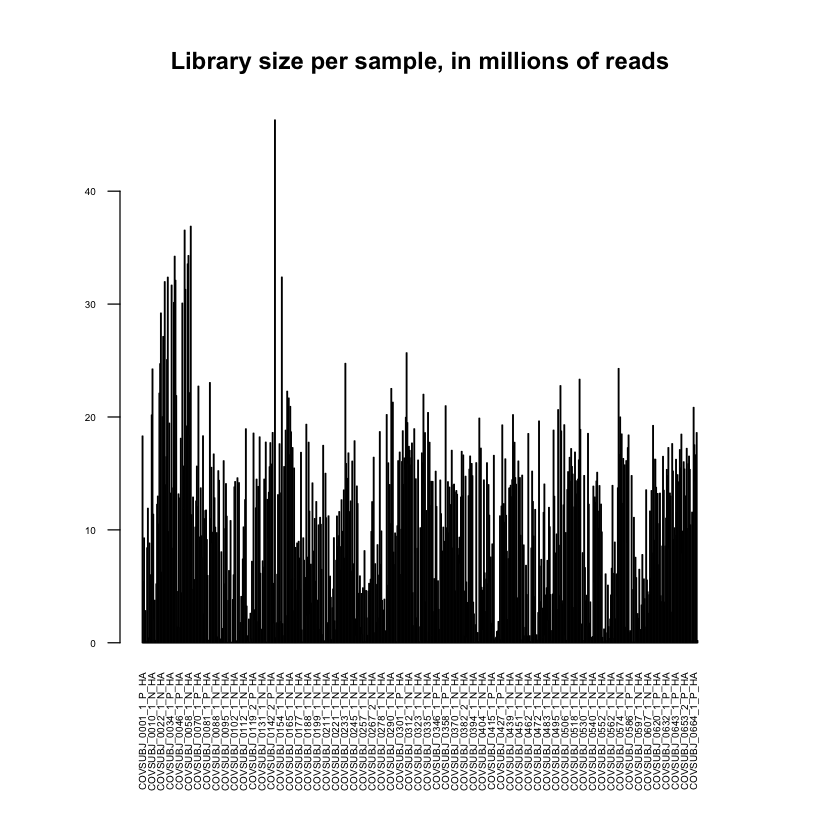

In [28]:
#Plot library size in millions of reads for each sample
par(mar=c(8,5,5,5), cex.axis=0.5)
options(scipen=-1)
barplot(gDgeList$samples$lib.size/1000000, horiz=F, names.arg=colnames(gDgeList$counts), las=2,
       main="Library size per sample, in millions of reads")

In [29]:
gSamplesToKeepMask = gDgeList$samples$lib.size > 10000000 # 10 million aligned reads
length(gDgeList$samples$lib.size)
sum(gSamplesToKeepMask==TRUE)

x = gDgeList[,gSamplesToKeepMask]
dim(x)

[1] 726

[1] 340

[1] 227954    340

In [30]:
cpm <- cpm(x)
lcpm <- cpm(x, log=TRUE)
# NUMBERS CHANGED
keep.exprs <- rowSums(cpm>3)>=10

x <- x[keep.exprs,, keep.lib.sizes=FALSE]
dim(x)

x <- calcNormFactors(x, method = "TMM")

[1] 75023   340

Warning message in brewer.pal(nsamples, "Paired"):
“n too large, allowed maximum for palette Paired is 12
Returning the palette you asked for with that many colors
”


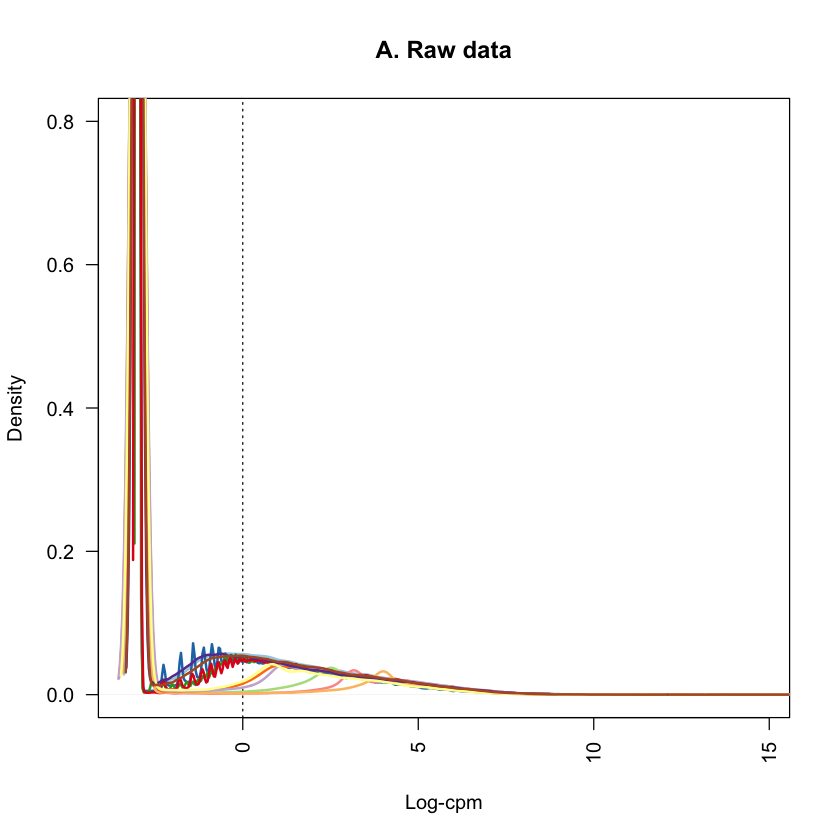

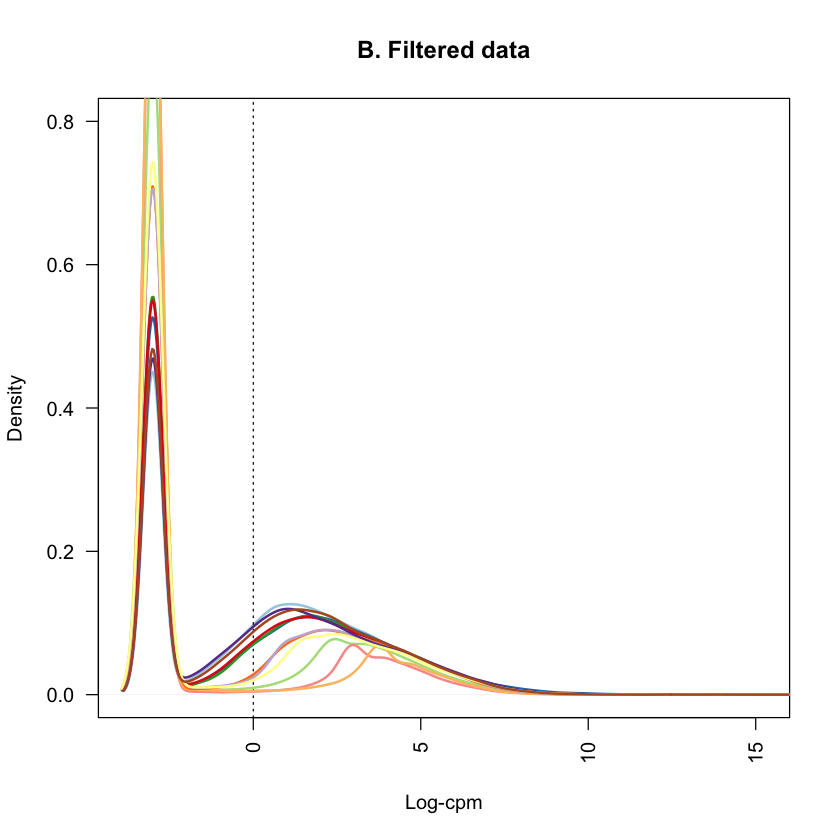

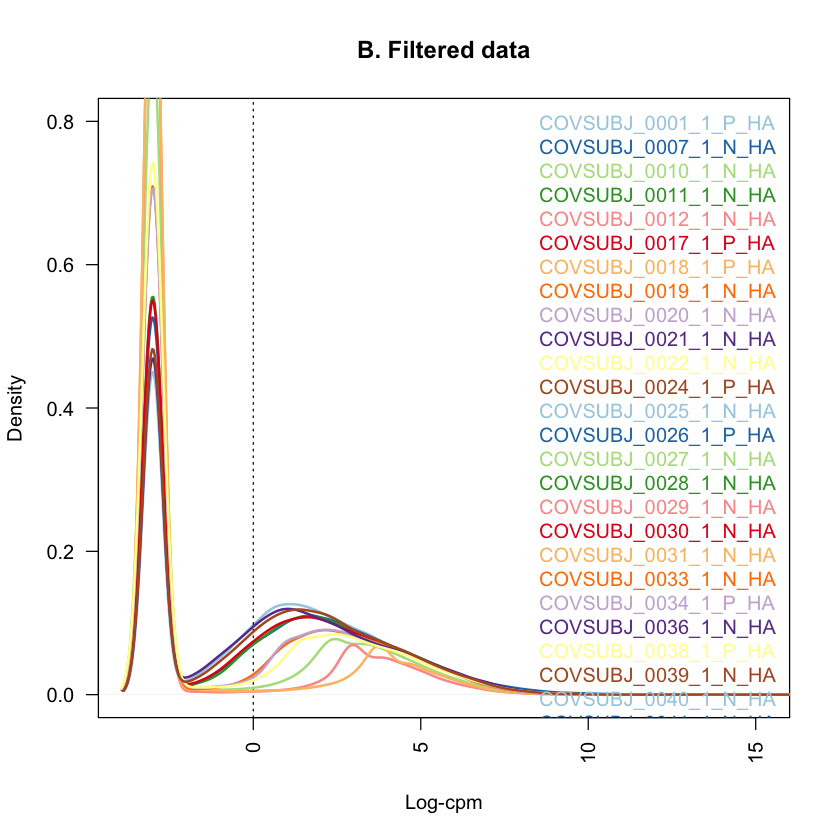

In [31]:
library(RColorBrewer)
nsamples <- ncol(x)
col <- brewer.pal(nsamples, "Paired")
#par(mfrow=c(1,2)≥)
plot(density(lcpm[,1]), col=col[1], lwd=2, ylim=c(0,.8), las=2, 
     main="", xlab="")
title(main="A. Raw data", xlab="Log-cpm")
abline(v=0, lty=3)
for (i in 2:nsamples){
 den <- density(lcpm[,i])
 lines(den$x, den$y, col=col[i], lwd=2)
}
#legend("topright", colnames(x), text.col=col, bty="n")
lcpm <- cpm(x, log=TRUE)
plot(density(lcpm[,1]), col=col[1], lwd=2, ylim=c(0,.8), las=2, 
     main="", xlab="")
title(main="B. Filtered data", xlab="Log-cpm")
abline(v=0, lty=3)
for (i in 2:nsamples){
   den <- density(lcpm[,i])
   lines(den$x, den$y, col=col[i], lwd=2)
}
#legend("topright", colnames(x), text.col=col, bty="n")

lcpm <- cpm(x, log=TRUE)
plot(density(lcpm[,1]), col=col[1], lwd=2, ylim=c(0,.8), las=2, 
     main="", xlab="")
title(main="B. Filtered data", xlab="Log-cpm")
abline(v=0, lty=3)
for (i in 2:nsamples){
   den <- density(lcpm[,i])
   lines(den$x, den$y, col=col[i], lwd=2)
}
legend("topright", colnames(x), text.col=col, bty="n")

In [32]:
class(lcpm)

[1] "matrix" "array"

In [33]:
head(lcpm)

,COVSUBJ_0001_1_P_HA,COVSUBJ_0007_1_N_HA,COVSUBJ_0010_1_N_HA,COVSUBJ_0011_1_N_HA,COVSUBJ_0012_1_N_HA,COVSUBJ_0017_1_P_HA,COVSUBJ_0018_1_P_HA,COVSUBJ_0019_1_N_HA,COVSUBJ_0020_1_N_HA,COVSUBJ_0021_1_N_HA,⋯,COVSUBJ_0658_1_P_HA,COVSUBJ_0659_1_N_HA,COVSUBJ_0660_1_P_HA,COVSUBJ_0662_1_P_HA,COVSUBJ_0663_1_P_HA,COVSUBJ_0664_1_P_HA,COVSUBJ_0665_1_P_HA,COVSUBJ_0666_1_N_HA,COVSUBJ_0667_1_P_HA,COVSUBJ_0668_1_P_HA
ENST00000373020,7.1883764,6.075292,5.248586,7.97844966,5.814174,7.3964324,2.947767,8.130501,8.087161,8.8767807,⋯,8.5739157,6.734779,6.970313,7.67963468,7.5031247,7.143376e+00,8.03543094,7.2474020,7.5291347,8.4344904
ENST00000496771,0.8164034,-3.002431,-3.002431,-0.06498184,-3.002431,-0.2736024,-3.002431,2.658905,1.236127,-0.0595315,⋯,-0.3537771,-3.002431,-3.002431,1.19384701,-0.4313787,-5.369390e-01,1.56539877,-0.4740728,0.1256241,1.5477119
ENST00000612152,-0.2406526,-3.002431,-3.002431,-3.00243137,-3.002431,-3.0024314,5.848120,-3.002431,-3.002431,-0.2993384,⋯,0.8162729,-3.002431,-3.002431,0.06863732,-3.0024314,3.724424e-01,-0.57357561,-3.0024314,-3.0024314,-3.0024314
ENST00000614008,0.7526793,-3.002431,-3.002431,1.10960700,-3.002431,-3.0024314,-3.002431,5.497462,-3.002431,3.3956396,⋯,2.7694273,3.144979,1.886442,0.49952570,-3.0024314,-8.951242e-04,2.63398969,1.2238224,-0.4672465,-3.0024314
ENST00000371582,0.9892430,-3.002431,-3.002431,-3.00243137,-3.002431,-0.8115675,-3.002431,2.726386,-3.002431,1.2872304,⋯,1.1754534,-3.002431,-3.002431,-3.00243137,-3.0024314,-3.002431e+00,-0.02384487,0.4486850,-3.0024314,-3.0024314
ENST00000371584,1.4603492,-3.002431,-3.002431,-3.00243137,-3.002431,-0.7753516,-3.002431,-3.002431,-3.002431,0.5174383,⋯,0.3868469,-3.002431,-3.002431,-1.36977830,0.1217846,7.473516e-01,0.12462967,0.2675675,1.4413487,0.7214966


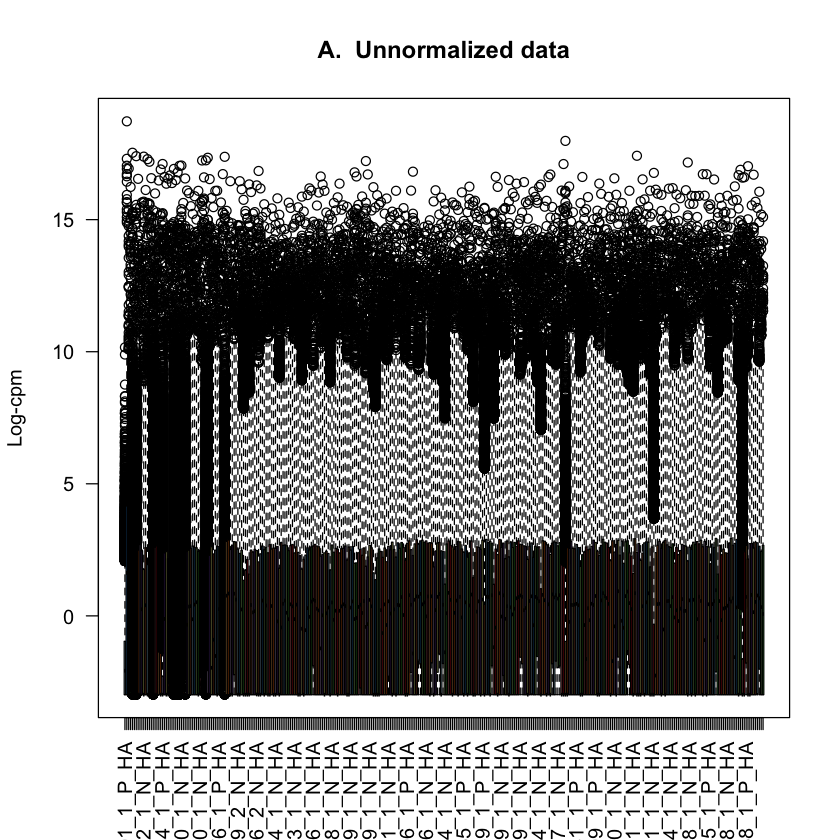

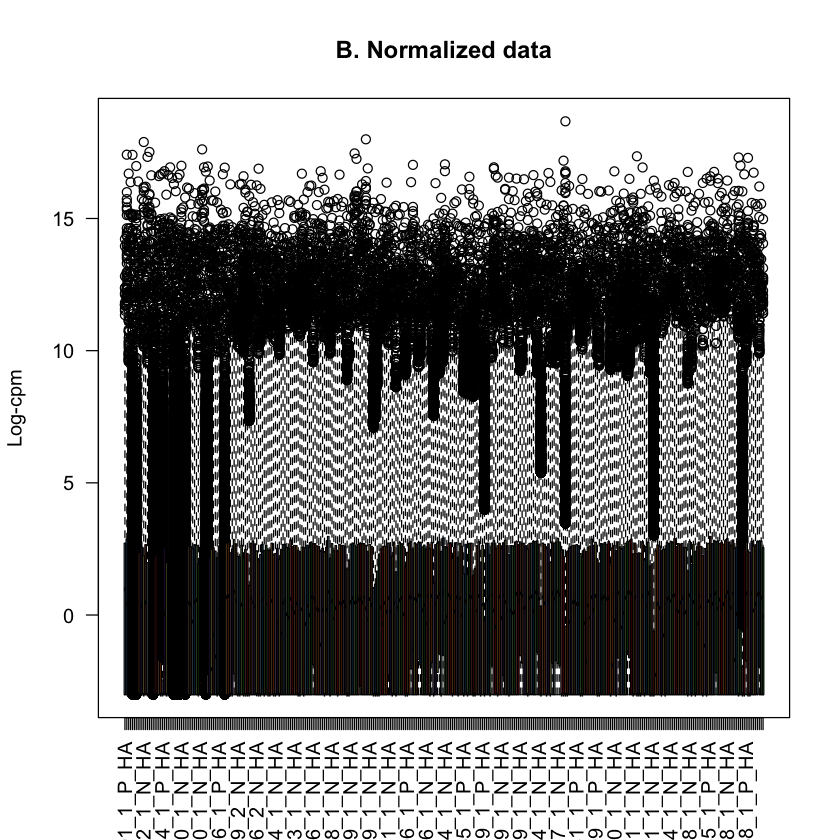

In [34]:
x2 <- x
x2$samples$norm.factors <- 1
x2$counts[,1] <- ceiling(x2$counts[,1]*0.05)
x2$counts[,2] <- x2$counts[,2]*5
#par(mfrow=c(1,2))
lcpm <- cpm(x2, log=TRUE)
boxplot(lcpm, las=2, col=col, main="")
title(main="A.  Unnormalized data",ylab="Log-cpm")
x2 <- calcNormFactors(x2)  

lcpm <- cpm(x2, log=TRUE)
boxplot(lcpm, las=2, col=col, main="")
title(main="B. Normalized data",ylab="Log-cpm")

In [35]:
dim(x)
dim(lcpm)

[1] 75023   340

[1] 75023   340

In [36]:
# Subset gene corresponding to the p110 and p150 isoform of ADAR

adar <- data.frame(lcpm[c("ENST00000368471", "ENST00000368474"),])
adar$ADAR <- row.names(adar)
row.names(adar) <- NULL
adar <- melt(adar, "ADAR")
adar[adar$ADAR=="ENST00000368471",]$ADAR <- "p110"
adar[adar$ADAR=="ENST00000368474",]$ADAR <- "p150"
names(adar) <- c("ADAR", "SampleID", "Count")
adar <- merge(adar, x$samples)
head(adar)

,SampleID,ADAR,Count,group,lib.size,norm.factors,SampleID_nobatch,Subject,SamplePlate_orig,IncludeInAnalysis,⋯,DIAGNOSIS_CerebralVascularDisease_LastDxDate_RelativeDay,VENT_Total_Ventilation_Orders,VENT_Tracheostomy_Performed,VENT_Tube_Exchange_Performed,VENT_Total_Ventilation_Minutes,VENT_First_Ventilation_Date_RelativeHour,RC_Patient_Age,RC_HISTORY_BMI,RC_HISTORY_Pregnancy,RC_HISTORY_PregnancyWeeks
,<fct>,<chr>,<dbl>,<fct>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<lgl>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
1,COVSUBJ_0001_1_P_HA,p110,5.791973,Detected,18078479,1.0686133,COVSUBJ_0001_1_P,COVSUBJ_0001,P10,TRUE,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,COVSUBJ_0001_1_P_HA,p150,8.876586,Detected,18078479,1.0686133,COVSUBJ_0001_1_P,COVSUBJ_0001,P10,TRUE,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,COVSUBJ_0007_1_N_HA,p110,6.765688,Not Detected,11819357,0.5568895,COVSUBJ_0007_1_N,COVSUBJ_0007,P1,TRUE,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,COVSUBJ_0007_1_N_HA,p150,8.492093,Not Detected,11819357,0.5568895,COVSUBJ_0007_1_N,COVSUBJ_0007,P1,TRUE,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,COVSUBJ_0010_1_N_HA,p110,7.473313,Not Detected,19790789,1.1534504,COVSUBJ_0010_1_N,COVSUBJ_0010,P2,TRUE,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,COVSUBJ_0010_1_N_HA,p150,-3.012843,Not Detected,19790789,1.1534504,COVSUBJ_0010_1_N,COVSUBJ_0010,P2,TRUE,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [37]:
adar.df <- adar
adar.df$Virus <- ifelse(adar.df$Type == "OtherViralInfection", yes="OVI", no=adar.df$ViralLoad_qPCR)
adar.df$Virus <- factor(adar.df$Virus, levels=c("None", "Low", "Medium", "High", "OVI"))
adar.df$Covid <- ifelse(adar.df$Type == "OtherViralInfection", yes="OtherViralInfection", no=adar.df$RT_PCR_Result)

# Visualization

In [38]:
# Import libraries 
library(ggplot2)
library(ggpubr)
library(ggsignif)

In [39]:
# Import color palette
jewels <- c("#81abce", "#8ead98", "#f6bd60", "#f578a0", "#9080a7")

In [40]:
head(adar.df)

,SampleID,ADAR,Count,group,lib.size,norm.factors,SampleID_nobatch,Subject,SamplePlate_orig,IncludeInAnalysis,⋯,VENT_Tracheostomy_Performed,VENT_Tube_Exchange_Performed,VENT_Total_Ventilation_Minutes,VENT_First_Ventilation_Date_RelativeHour,RC_Patient_Age,RC_HISTORY_BMI,RC_HISTORY_Pregnancy,RC_HISTORY_PregnancyWeeks,Virus,Covid
,<fct>,<chr>,<dbl>,<fct>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<lgl>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<fct>,<chr>
1,COVSUBJ_0001_1_P_HA,p110,5.791973,Detected,18078479,1.0686133,COVSUBJ_0001_1_P,COVSUBJ_0001,P10,TRUE,⋯,NA,NA,NA,NA,NA,NA,NA,NA,High,Detected
2,COVSUBJ_0001_1_P_HA,p150,8.876586,Detected,18078479,1.0686133,COVSUBJ_0001_1_P,COVSUBJ_0001,P10,TRUE,⋯,NA,NA,NA,NA,NA,NA,NA,NA,High,Detected
3,COVSUBJ_0007_1_N_HA,p110,6.765688,Not Detected,11819357,0.5568895,COVSUBJ_0007_1_N,COVSUBJ_0007,P1,TRUE,⋯,NA,NA,NA,NA,NA,NA,NA,NA,None,Not Detected
4,COVSUBJ_0007_1_N_HA,p150,8.492093,Not Detected,11819357,0.5568895,COVSUBJ_0007_1_N,COVSUBJ_0007,P1,TRUE,⋯,NA,NA,NA,NA,NA,NA,NA,NA,None,Not Detected
5,COVSUBJ_0010_1_N_HA,p110,7.473313,Not Detected,19790789,1.1534504,COVSUBJ_0010_1_N,COVSUBJ_0010,P2,TRUE,⋯,NA,NA,NA,NA,NA,NA,NA,NA,None,Not Detected
6,COVSUBJ_0010_1_N_HA,p150,-3.012843,Not Detected,19790789,1.1534504,COVSUBJ_0010_1_N,COVSUBJ_0010,P2,TRUE,⋯,NA,NA,NA,NA,NA,NA,NA,NA,None,Not Detected


In [41]:
# # Expression of ADAR1 irregardless of isoform
# pdf("20221117_ADAR1Expression.pdf",  width = 9, height = 6)

# ggboxplot(adar.df, x = "Virus", y = "Count", palette = jewels, color = "Virus", ylab = "ADAR1 Expression",
#          add = "jitter")

# dev.off()

In [42]:
# pdf("20221117_ADAR1Expression_ByIsoform.pdf",  width = 9, height = 6)
# ggboxplot(adar.df, x = "ADAR", y = "Count", palette = jewels, color = "Virus", ylab = "ADAR1 Expression",
#          add = "jitter")
# ggboxplot(adar.df, x = "ADAR", y = "Count", color = "Black", palette = jewels, ylab = "ADAR1 Expression", fill = "Virus")

# dev.off()

In [43]:
# pdf("20221117_ADAR1Expression_ByIsoform_Jitter.pdf",  width = 9, height = 6)
# ggboxplot(adar.df, x = "ADAR", y = "Count", palette = jewels, color = "Virus", ylab = "ADAR1 Expression",
#          add = "jitter")

# dev.off()

In [44]:
# pdf("20221117_ADAR1Expression_ByVirusWithIsoform.pdf",  width = 9, height = 6)

# ggboxplot(adar.df, x = "Virus", y = "Count", color = "Black", ylab = "ADAR1 Expression", fill = "ADAR")
# dev.off()

In [45]:
# pdf("20221117_ADAR1Expression_ByVirusWithIsoform_Jitter.pdf",  width = 9, height = 6)

# ggboxplot(adar.df, x = "Virus", y = "Count", color = "ADAR", ylab = "ADAR1 Expression",
#          add = "jitter")
# dev.off()

## Plots With Stats

In [46]:
# pdf("20221117_ADAR1Expression_Stats.pdf",  width = 9, height = 6)

# p <- ggboxplot(adar.df, x = "Virus", y = "Count", palette = jewels, color = "Virus", ylab = "ADAR1 Expression log2cpm TMM-Normalized",
#          add = "jitter")
# my_comparisons <- list(c("None", "OVI"), c("None", "High"), c("None", "Medium"), c("None", "Low"),  
#                            c("OVI", "Low"), c("High", "Low"), c("Medium", "Low"), 
#                            c("OVI", "Medium"), c("Medium", "High"), c("OVI", "High"))

# print(p + stat_compare_means(comparisons = my_comparisons, method = "t.test"))

# dev.off()

In [47]:
# pdf("20221117_ADAR1Expression_ByIsoform_Stats.pdf",  width = 9, height = 10)

# p <- ggboxplot(adar.df, x = "ADAR", y = "Count", palette = jewels, color = "Virus", 
#                ylab = "ADAR1 Expression log2cpm TMM-Normalized", add = "jitter", facet.by = "Virus",
#               short.panel.labs = FALSE)

# print(p + stat_compare_means(aes(label = paste0("p = ", ..p.format..)), method = "t.test"))
# dev.off()

In [48]:
pdf("20230216_ADAR1Expression_ByVirusWithIsoform_Stats_Norm.pdf",  width = 10, height = 6)

p <- ggboxplot(adar.df, x = "Virus", y = "Count", color = "Virus", palette = jewels, ylab = "ADAR1 Expression log2cpm TMM-Normalized",
         add = "jitter", facet.by = "ADAR", short.panel.labs = FALSE) 

my_comparisons <- list(c("None", "OVI"), c("None", "High"), c("None", "Medium"), c("None", "Low"),  
                           c("OVI", "Low"), c("High", "Low"), c("Medium", "Low"), 
                           c("OVI", "Medium"), c("Medium", "High"), c("OVI", "High"))
print(p + stat_compare_means(comparisons = my_comparisons, method = "t.test"))
dev.off()

pdf 
  2

In [49]:
pdf("20230216_ADAR1Expression_ByIsoform_Stats_Norm.pdf",  width = 10, height = 6)
options(repr.plot.width=10, repr.plot.height=6)
p <- ggboxplot(adar.df, x = "Virus", y = "Count", palette = c("#85BEC9", "#CE839F"), color = "ADAR", 
               ylab = "ADAR1 Expression log2cpm TMM-Normalized", xlab = "Viral Load", add = "jitter")
print(p +  stat_compare_means(aes(group = ADAR), method = "t.test", label.y = 12) )
dev.off()

pdf 
  2

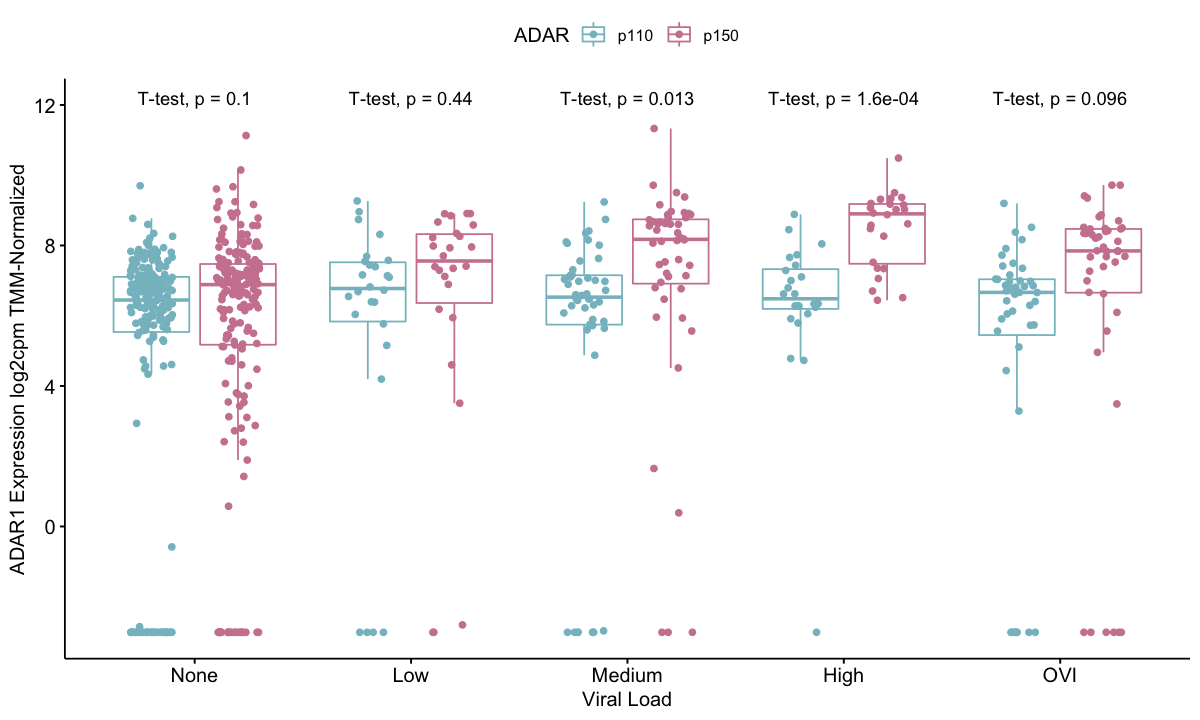

In [50]:
options(repr.plot.width=10, repr.plot.height=6)
p <- ggboxplot(adar.df, x = "Virus", y = "Count", palette = c("#85BEC9", "#CE839F"), color = "ADAR", 
               ylab = "ADAR1 Expression log2cpm TMM-Normalized", xlab = "Viral Load", add = "jitter")
print(p +  stat_compare_means(aes(group = ADAR), method = "t.test", label.y = 12) )

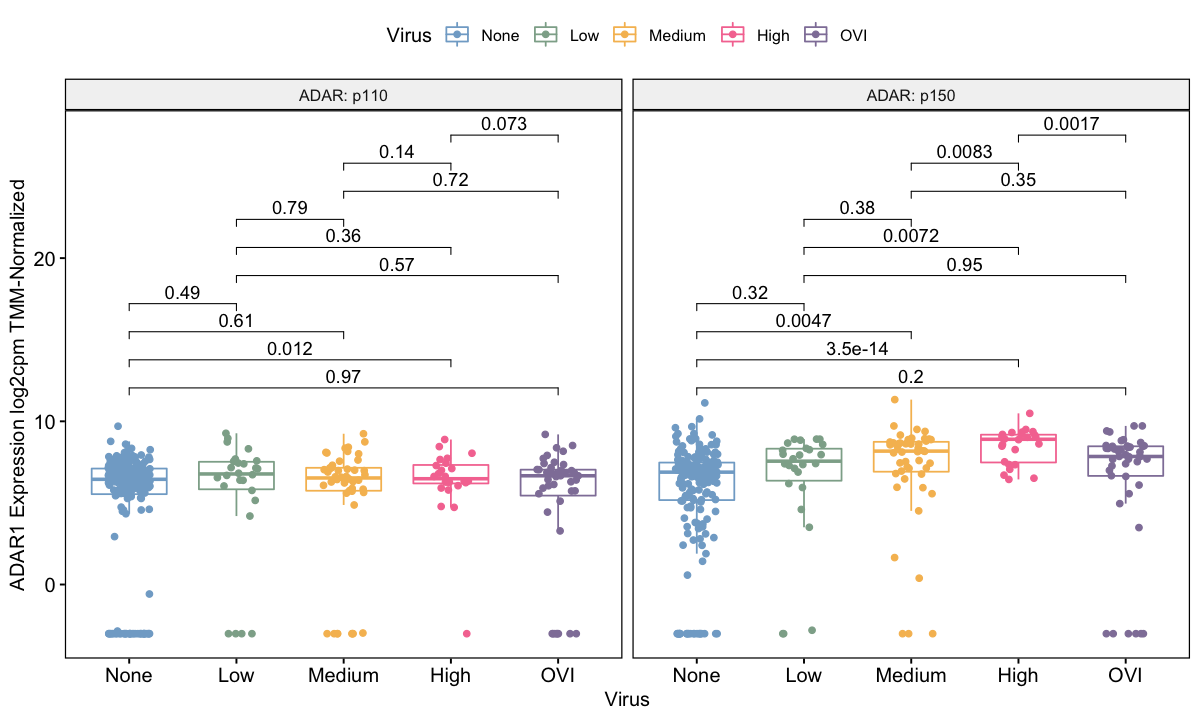

In [51]:
options(repr.plot.width=10, repr.plot.height=6) 
p <- ggboxplot(adar.df, x = "Virus", y = "Count", color = "Virus", palette = jewels, ylab = "ADAR1 Expression log2cpm TMM-Normalized",
         add = "jitter", facet.by = "ADAR", short.panel.labs = FALSE) 

my_comparisons <- list(c("None", "OVI"), c("None", "High"), c("None", "Medium"), c("None", "Low"),  
                           c("OVI", "Low"), c("High", "Low"), c("Medium", "Low"), 
                           c("OVI", "Medium"), c("Medium", "High"), c("OVI", "High"))
print(p + stat_compare_means(comparisons = my_comparisons, method = "t.test"))

In [53]:
pdf("20230216_ADAR1Expression_ByVirusWithIsoform_Stats_Norm_Sig.pdf",  width = 10, height = 6)
p <- ggboxplot(adar.df, x = "Virus", y = "Count", color = "Virus", palette = jewels, ylab = "ADAR1 Expression log2cpm TMM-Normalized",
         add = "jitter", facet.by = "ADAR", short.panel.labs = FALSE) 

my_comparisons <- list(c("None", "High"), c("None", "Medium"), c("High", "Low"), 
                     c("Medium", "High"), c("OVI", "High"))
print(p + stat_compare_means(comparisons = my_comparisons, method = "t.test"))
dev.off()

pdf 
  2

In [54]:
sessionInfo()

R version 4.1.3 (2022-03-10)
Platform: x86_64-apple-darwin13.4.0 (64-bit)
Running under: macOS Big Sur/Monterey 10.16

Matrix products: default
BLAS/LAPACK: /Users/mollyhuang/opt/miniconda3/envs/bulk_rnaseq/lib/libopenblasp-r0.3.20.dylib

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] ggsignif_0.6.3                         
 [2] ggpubr_0.4.0                           
 [3] ggplot2_3.3.6                          
 [4] RColorBrewer_1.1-3                     
 [5] reshape2_1.4.4                         
 [6] statmod_1.4.36                         
 [7] Glimma_2.4.0                           
 [8] Homo.sapiens_1.3.1                     
 [9] TxDb.Hsapiens.UCSC.hg19.knownGene_3.2.2
[10] org.Hs.eg.db_3.14.0                    
[11] GO.db_3.14.0                           
[12] OrganismDbi_1.36.0                     
[13] Gen